Задача 1 (6 баллов). 
В файле «global-electricity-generation.csv» представлена информация о производстве электроэнергии странами с 1992 по 2021 год. В файле
«global-electricity-consumption.csv» – информация о потреблении электроэнергии. Все данные – в млрд. кВт*ч.

1. Загрузите информацию из этих файлов.
Указание: рекомендуется воспользоваться функцией genfromtxt. Обратите внимание, что данные в файлах разделены запятой, в обоих файлах есть заголовок, который при загрузке нужно пропустить. Для корректной загрузки названий стран необходимо также указать тип данных (по умолчанию загружаемые данные преобразуются в вещественный тип). Вы можете либо собрать все данные в один массив записей, либо работать с тремя разными массивами: массив названий стран (одномерный, строки), массивы
производства и потребления энергии (двумерные, вещественные)). Порядок стран в двух исходных файлах одинаковый.

In [ ]:
import numpy as np

countries = np.genfromtxt(
    'global-electricity-generation.csv',
    delimiter=',',
    dtype=str,
    skip_header=1,
    usecols=0
)

generation = np.genfromtxt(
    'global-electricity-generation.csv',
    delimiter=',',
    dtype=float,
    skip_header=1,
    usecols=range(1, 31)
)

consumption = np.genfromtxt(
    'global-electricity-consumption.csv',
    delimiter=',',
    dtype=float,
    skip_header=1,
    usecols=range(1, 31)
)

print("Countries loaded:", len(countries))

Загружено стран: 217
Года: 1992–2021 (30 лет)


2. Создание массивов средних значений за последние 5 лет (2017–2021)
Последние 5 лет → индексы: 25, 26, 27, 28, 29
np.nanmean игнорирует NaN — это важно, если есть пропущенные данные.
В агрегирующих функциях для построчной обработки нужно указывать параметр axis=1.

In [2]:
avg_gen_last5 = np.nanmean(generation[:, 25:30], axis=1)
avg_cons_last5 = np.nanmean(consumption[:, 25:30], axis=1)

/tmp/ipykernel_24138/1723355615.py:1: RuntimeWarning: Mean of empty slice
  avg_gen_last5 = np.nanmean(generation[:, 25:30], axis=1)


3. Напишите выражения, позволяющие получить ответ на следующие вопросы:

3.1. Суммарное (по всем странам) потребление электроэнергии за каждый год.

In [3]:
total_consumption_per_year = np.nansum(consumption, axis=0)
print("Total consumption by year (billion kWh):")
for i, year in enumerate(range(1992, 2022)):
    print(f"{year}: {total_consumption_per_year[i]:.2f}")

Total consumption by year (billion kWh):
1992: 10569.02
1993: 10854.56
1994: 11104.65
1995: 11476.48
1996: 11805.87
1997: 12122.03
1998: 12419.81
1999: 12685.75
2000: 13230.25
2001: 13486.49
2002: 13938.78
2003: 14455.56
2004: 15128.10
2005: 15725.98
2006: 16438.21
2007: 17205.12
2008: 17477.47
2009: 17435.69
2010: 18748.16
2011: 19438.82
2012: 19918.25
2013: 20573.10
2014: 20981.24
2015: 21400.02
2016: 22022.69
2017: 22716.21
2018: 23530.92
2019: 23915.66
2020: 23959.68
2021: 25336.71


3.2. Максимальное количество электроэнергии, которое произвела одна страна за один год (указание: чтобы не учитывать отсутствующие и некорректные данные (nan) воспользуйтесь NaN-безопасной версией функции max, то есть nanmax).

In [4]:
max_production = np.nanmax(generation)
print(f"Maximum annual production by one country: {max_production:.2f} billion kWh")

Maximum annual production by one country: 8151.52 billion kWh


3.3. Список стран, которые производят более 500 млрд. кВт*ч электроэнергии ежегодно в среднем за последние 5 лет (воспользуйтесь массивом, полученным на шаге 2).

In [5]:
high_producers_mask = avg_gen_last5 > 500
high_producers = countries[high_producers_mask]
print("Countries producing on average >500 billion kWh over the last 5 years:")
for country in high_producers:
    print(country)

Countries producing on average >500 billion kWh over the last 5 years:
Russia
France
Germany
China
India
Japan
South Korea
Canada
United States
Brazil


3.4. 10% стран, которые потребляют больше всего электроэнергии ежегодно в среднем за последние 5 лет (указание: вначале определите соответствующую квантиль в массиве, построенном на шаге 2).

In [6]:
threshold_90 = np.nanpercentile(avg_cons_last5, 90)

top10_percent_mask = avg_cons_last5 >= threshold_90
top10_countries = countries[top10_percent_mask]

print(f"Top 10% threshold: {threshold_90:.2f} billion kWh")
print("Countries in the top 10% by consumption:")
for country in top10_countries:
    print(country)

Top 10% threshold: 198.31 billion kWh
Countries in the top 10% by consumption:
South Africa
Russia
France
Germany
Italy
Spain
Turkiye
United Kingdom
Australia
China
India
Indonesia
Japan
South Korea
Taiwan
Vietnam
Iran
Saudi Arabia
Canada
Mexico
United States
Brazil


3.5. Список стран, которые увеличили производство электроэнергии в 2021 году по сравнению с 1992 годом более, чем в 10 раз.

In [7]:
prod_1992 = generation[:, 0]
prod_2021 = generation[:, 29]

increased_10x_mask = (prod_1992 > 0) & (prod_2021 / prod_1992 > 10)
increased_10x_countries = countries[increased_10x_mask]

print("Countries that increased production more than 10-fold from 1992 to 2021:")
for country in increased_10x_countries:
    print(country)

Countries that increased production more than 10-fold from 1992 to 2021:
Angola
Benin
Equatorial Guinea
Ethiopia
Mali
Mauritania
Mozambique
Sudan
Cambodia
China
Laos
Maldives
Vietnam
Turks and Caicos Islands


/tmp/ipykernel_24138/1755747688.py:4: RuntimeWarning: divide by zero encountered in divide
  increased_10x_mask = (prod_1992 > 0) & (prod_2021 / prod_1992 > 10)
/tmp/ipykernel_24138/1755747688.py:4: RuntimeWarning: invalid value encountered in divide
  increased_10x_mask = (prod_1992 > 0) & (prod_2021 / prod_1992 > 10)


3.6. Список стран, которые в сумме за все годы потратили больше 100 млрд. кВт*ч электроэнергии и при этом произвели меньше, чем потратили.

In [8]:
total_gen = np.nansum(generation, axis=1)
total_cons = np.nansum(consumption, axis=1)

condition_mask = (total_cons > 100) & (total_gen < total_cons)
countries_condition = countries[condition_mask]

print("Countries that spent >100 billion in total and produced less than they spent:")
for country in countries_condition:
    print(f"{country}: produced {total_gen[condition_mask][list(countries_condition).index(country)]:.2f}, "
          f"spent {total_cons[condition_mask][list(countries_condition).index(country)]:.2f}")

Countries that spent >100 billion in total and produced less than they spent:
Zimbabwe: produced 238.18, spent 260.62
Belarus: produced 895.46, spent 922.33
Moldova: produced 180.22, spent 202.82
Belgium: produced 2342.36, spent 2395.91
Croatia: produced 342.39, spent 418.57
Finland: produced 2069.42, spent 2356.64
Hungary: produced 981.68, spent 1066.96
Italy: produced 7879.03, spent 8576.57
Latvia: produced 146.66, spent 179.29
Luxembourg: produced 38.27, spent 177.54
Netherlands: produced 2896.51, spent 3106.41
North Macedonia: produced 177.76, spent 186.88
Hong Kong: produced 998.42, spent 1152.85


3.7. Какая страна потратила наибольшее количество электроэнергии в 2020 году?

In [9]:
cons_2020 = consumption[:, 28]
max_cons_2020_idx = np.nanargmax(cons_2020)
max_cons_2020_country = countries[max_cons_2020_idx]
max_cons_2020_value = cons_2020[max_cons_2020_idx]

print(f"Highest consumption in 2020: {max_cons_2020_country} — {max_cons_2020_value:.2f} billion kWh")

Highest consumption in 2020: China — 7115.08 billion kWh


Задача 2 (6 баллов). В файле «data2.csv» представлены данные наблюдений о прибыли (второй столбец) в зависимости от установленной скидки (первый столбец).
Комментарий. На самом деле эти данные сгенерированы синтетически, в учебных целях, но смысл значений в этой задаче не важен, и эти данные можно рассматривать как реальный датасет. Бизнес-консультанты считают, что реальная зависимость прибыли от установленной скидки может быть описана квадратичной или кубической функцией (то есть полиномом второй или третьей степени, f(x) = a_2*x^2 +a_1*x+a_0 или
f(x) = a_3*x^3 + a_2*x^2 + a_1*x+a_0).

In [4]:
import numpy as np
import pandas as pd
import scipy.linalg
import matplotlib.pyplot as plt

data = data = np.genfromtxt('data2.csv', delimiter=';', skip_header=1)
x = data[:, 0]
y = data[:, 1]

1. Сформируйте систему линейных уравнений (СЛУ) для полинома 2й степени (для этого нужно выбрать 3 точки, в которых значение полинома должно совпадать с исходными данными; точки лучше выбирать равномерно «разбросанными» по исходным данным, то есть одна в начале имеющегося диапазона данных, одна в конце и одна в середине).

In [ ]:
n = len(x)
indices_2 = [0, n//2, -1]
x2 = x[indices_2]
y2 = y[indices_2]

A2 = np.vander(x2, 3)

b2 = y2

a2=-1.3775, a1=13.7903, a0=-9.2756


2. Решите СЛУ (с помощью scipy.linalg.solve), тем самым найдя коэффициенты полинома.

In [8]:
coeffs_2 = scipy.linalg.solve(A2, b2)
a2, a1, a0 = coeffs_2

print(f"a2={a2:.4f}, a1={a1:.4f}, a0={a0:.4f}")

a2=-1.3775, a1=13.7903, a0=-9.2756


3. Получите вектор значений построенного полинома для заданных точек.

In [10]:
y_poly2 = a2 * x**2 + a1 * x + a0
print(y_poly2)

[-6.57266488 -3.97990798 -1.49734781  0.87501564  3.13718236  5.28915236
  7.33092563  9.26250217 11.08388198 12.79506506 14.39605142 15.88684106
 17.26743396 18.53783014 19.69802959 20.74803231 21.68783831 22.51744758
 23.23686012 23.84607594 24.34509503 24.73391739 25.01254302 25.18097193
 25.23920411]


4. Постройте в одной области два графика: один по заданным в файле точкам, другой – по полученному вектору.

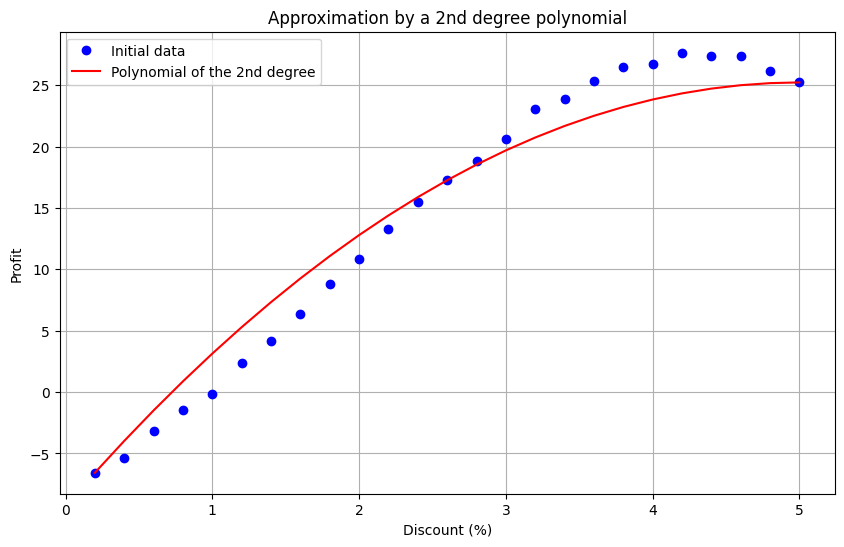

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Initial data', color='blue')
plt.plot(x, y_poly2, '-', label='Polynomial of the 2nd degree', color='red')
plt.xlabel('Discount (%)')
plt.ylabel('Profit')
plt.title('Approximation by a 2nd degree polynomial')
plt.legend()
plt.grid(True)
plt.show()

5. Посчитайте значение квадратичного отклонения RSS (оно вычисляется по формуле R SS=∑(n, i=1)(y_i−f(x_i))^2, где y_i – ожидаемые значения (из исходногофайла), f(x_i) – рассчитанные значения полинома).

In [12]:
rss_2 = np.sum((y - y_poly2)**2)
print(f"RSS for a 2nd degree polynomial: {rss_2:.4f}")

RSS for a 2nd degree polynomial: 120.7875


6. Повторите шаги 1-5 для полинома 3й степени (для этого нужно будет выбрать 4 точки).

Coefficients of a third-degree polynomial: a3=-0.5485, a2=2.9039, a1=5.8111, a0=-7.8466


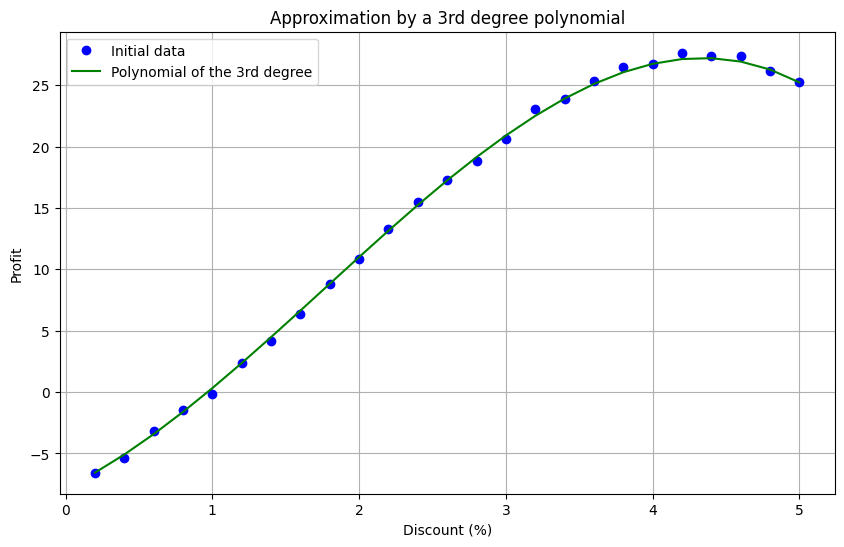

RSS for a 3nd degree polynomial: 1.8784


In [14]:
indices_3 = [0, n//3, 2*n//3, -1]
x3 = x[indices_3]
y3 = y[indices_3]

A3 = np.array([
    [x3[0]**3, x3[0]**2, x3[0], 1],
    [x3[1]**3, x3[1]**2, x3[1], 1],
    [x3[2]**3, x3[2]**2, x3[2], 1],
    [x3[3]**3, x3[3]**2, x3[3], 1]
])

b3 = y3

coeffs_3 = scipy.linalg.solve(A3, b3)
a3, a2_3, a1_3, a0_3 = coeffs_3

print(f"Coefficients of a third-degree polynomial: a3={a3:.4f}, a2={a2_3:.4f}, a1={a1_3:.4f}, a0={a0_3:.4f}")

y_poly3 = a3 * x**3 + a2_3 * x**2 + a1_3 * x + a0_3

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Initial data', color='blue')
plt.plot(x, y_poly3, '-', label='Polynomial of the 3rd degree', color='green')
plt.xlabel('Discount (%)')
plt.ylabel('Profit')
plt.title('Approximation by a 3rd degree polynomial')
plt.legend()
plt.grid(True)
plt.show()

rss_3 = np.sum((y - y_poly3)**2)
print(f"RSS for a 3nd degree polynomial: {rss_3:.4f}")

7. Выберите тот вариант, где значение отклонения (RSS) получается наименьшим. Для этого варианта посчитайте ожидаемое значение прибыли при значениях скидки в 6 и 8 процентов.

In [15]:
if rss_2 < rss_3:
    print("A 2nd degree polynomial fits better.")
    best_poly = lambda xi: a2 * xi**2 + a1 * xi + a0
else:
    print("A 3rd degree polynomial fits better.")
    best_poly = lambda xi: a3 * xi**3 + a2_3 * xi**2 + a1_3 * xi + a0_3

discount_6 = best_poly(6)
discount_8 = best_poly(8)

print(f"Predicted profit with 6% discount: {discount_6:.2f}")
print(f"Predicted profit with 8% discount: {discount_8:.2f}")

A 3rd degree polynomial fits better.
Predicted profit with 6% discount: 13.08
Predicted profit with 8% discount: -56.36
